In [1]:
%matplotlib inline
import numpy as np
import numpy.random as rng
import pylab as pl

In [2]:
Npats, Nins = 100, 2
X = 5*rng.normal(0,1,size=(Npats,Nins))
w_truth = rng.normal(0,1,size=(Nins))
b_truth = 4.*rng.normal(0,1,size=(1))
phi = np.dot(X, w_truth) + b_truth
Targ = np.where(phi > 0.0, 1, 0)

In [9]:
def show_result():
    pl.clf()
    msize = 8
    cl ={0:'red', 1:'black'}
    for i, x in enumerate(X):
        pl.plot(x[0],x[1],'x',color=cl[int(Targ[i])],alpha=.4,markersize=msize)
        pl.plot(x[0],x[1],'o',color=cl[int(Targ[i])],alpha=1.-float(abs(Targ[i]-Y[i])),markersize=msize)
        
    pl.axis('equal')
    v = -b * w / np.sum(w*w)
    pl.arrow(.7*v[0], .7*v[1], .3*v[0], .3*v[1], head_width=20., head_length=1.5, fc='g', ec='g', linewidth=3, alpha=.4)
    #pl.arrow(m[0]-w[0], m[1]-w[1], w[0], w[1], head_width=25.0, head_length=1.0, fc='b', ec='b', linewidth=3, alpha=.35)
    pl.show()

  

## Learning, starting from random weights and bias.

Red and Black are target 0 and 1 patterns respectively.

They will get "filled in" once the perceptron is getting them correct.

In [10]:
def do_one_step(w,b,X,Targ,rate):
    phi = np.dot(X,w) + b 
    Y = 1.0/(1. + np.exp(-phi))   # Sigmoid perceptron ('logistic regression')
    dw = (np.sum(np.atleast_2d(Targ-Y).T*(X), axis=0))
    db = (np.sum(np.atleast_2d(Targ-Y).T, axis=0))
    w = w + rate * dw   # one step of learning
    b = b + rate * db   # one step of learning
    return (w,b,Y)

### Initialise to random values so we're not 'cheating'

In [11]:
w = rng.normal(0,1,size=(Nins))
b = 4.*rng.normal(0,1,size=(1))
rate = 0.1 / Npats

#### Each execution of the next cell does one 'step' of learning.


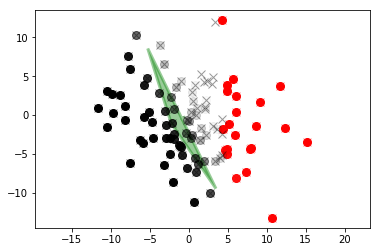

[-0.81956797 -0.39882081] [-0.90759328]
loss:  -100.413894902


In [31]:
w,b,Y = do_one_step(w,b,X,Targ,rate)
show_result()
print(w,b)
print('loss: ', np.sum(Targ*np.log(Y) + (1-Targ)*np.log(1-Y)))

#### That's tedious: how about just do 50 steps at once

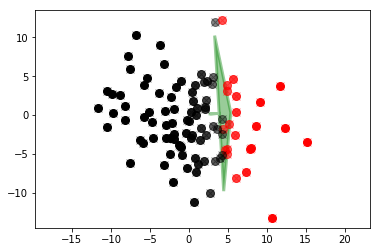

[-0.67417044 -0.03928907] [ 2.63353157]
loss:  -15.7667518026


In [37]:
for t in range(50):
    w,b,Y = do_one_step(w,b,X,Targ,rate)
show_result()
print(w,b)
print('loss: ', np.sum(Targ*np.log(Y) + (1-Targ)*np.log(1-Y)))
